<a href="https://colab.research.google.com/github/Gise05624/Proyecto_DataScience_I/blob/main/Entrega_1/ProyectoDS_ParteI_Bargas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primera Entrega

### Archivo: ProyectoDS_ParteI_Bargas.ipynb


---


# 📌 Abstract

En este trabajo utilice un archivo que se encontraba dentro de la plataforma de Coder House el cual se compone por un conjunto de datos relacionados con ventas, con el objetivo de entender qué factores influyen en los resultados comerciales. Me propuse responder la siguiente pregunta: ¿Qué variables están relacionadas con un mayor volumen de ventas? A partir de esa pregunta, formulé algunas hipótesis vinculadas con la región, el tipo de producto, la satisfacción del cliente y los costos operativos.

Comencé explorando el dataset, revisando si había valores faltantes y observando las estadísticas básicas de las variables numéricas. Luego, generé diferentes visualizaciones utilizando las librerías Matplotlib y Seaborn, aplicando parámetros como hue, size y grid para hacer los gráficos más claros y comparativos. También usé gráficos univariados, bivariados y multivariados para profundizar en el análisis.

Entre los principales resultados que encontré, noté que algunas regiones tienen mejores niveles de ventas que otras, y que los productos se comportan de forma muy distinta según la zona. También observé que la satisfacción del cliente parece tener una relación positiva con el nivel de ventas: cuando los clientes están más satisfechos, compran más. Por otro lado, vi que un mayor costo operativo no siempre se traduce en más ventas. Además, analizando la evolución mes a mes, descubrí que las ventas tienen comportamientos cíclicos que podrían aprovecharse para tomar decisiones estratégicas.

Cada gráfico fue acompañado de una interpretación personal, buscando entender qué historia cuenta cada visualización y cómo se relaciona con las hipótesis planteadas. Gracias a este enfoque, pude obtener varios insights útiles, como saber qué productos funcionan mejor en determinadas regiones o cómo planificar según los momentos del año.

En conclusión, este trabajo me permitió aplicar herramientas de análisis de datos y visualización para encontrar respuestas claras a una problemática concreta. Creo que este tipo de análisis es muy valioso para tomar decisiones informadas dentro de una empresa, especialmente si se quiere mejorar la estrategia comercial.



---



# ❓ Pregunta principal:
¿Qué factores hacen que las ventas sean más altas? ¿Tienen algo que ver la región, el producto, la satisfacción del cliente o los costos operativos?

# 🎯 Objetivo del análisis:
Analizar los datos de ventas para entender cómo se comportan en diferentes regiones y productos, y ver si hay alguna relación con la satisfacción del cliente o los costos. La idea es encontrar información útil para tomar mejores decisiones.

# 💡 Hipótesis

* Las regiones donde los clientes están más satisfechos tienen mejores ventas.

* No siempre los productos más caros de operar son los que más venden.

* Las ventas cambian mes a mes según el producto y la región.

* Si los clientes están más conformes, es más probable que compren más.


---



## 📊 Visualizaciones y Análisis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/Actividad_visualizacion_en_python/ventas_dataset_actdeclase.csv")
df.head()

,Region,Producto,Mes,Ventas,Satisfaccion_Cliente,Costo_Operativo
0,Norte,Producto_A,2023-01,4174,4.593086,1794
1,Norte,Producto_A,2023-02,2130,4.559382,2138
2,Norte,Producto_A,2023-03,3169,3.311989,830
3,Norte,Producto_A,2023-04,2482,4.732352,630
4,Norte,Producto_A,2023-05,2685,3.112823,2891


In [ ]:
df.isnull().sum()

,0
Region,0
Producto,0
Mes,0
Ventas,0
Satisfaccion_Cliente,0
Costo_Operativo,0


In [ ]:
df.describe()

,Ventas,Satisfaccion_Cliente,Costo_Operativo
count,144.000000,144.000000,144.000000
mean,3144.236111,4.028516,1766.666667
std,1136.737000,0.562383,672.763843
min,1019.000000,3.013904,504.000000
25%,2148.750000,3.586549,1194.500000
50%,3164.500000,4.062289,1834.500000
75%,4126.500000,4.470005,2261.250000
max,4991.000000,4.995481,2933.000000


## 📊 Graficos con Matplotbil

### 👥💼 Se ve claramente que algunas regiones venden mucho más que otras. Esto puede deberse a que tienen más clientes o mejores condiciones para vender.

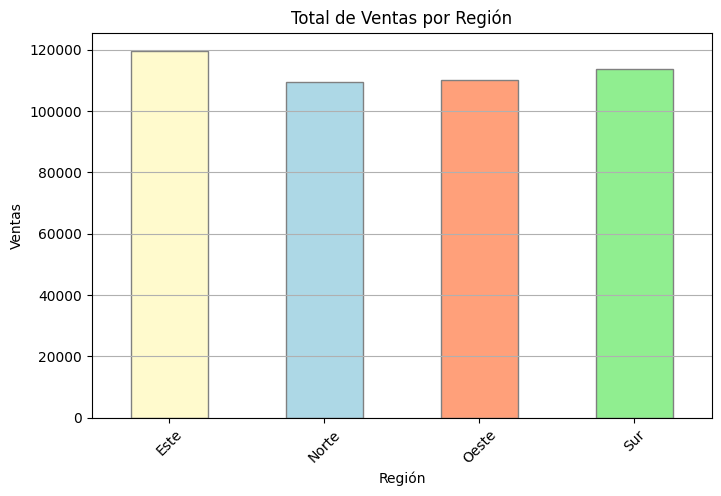

In [ ]:
# Agrupar ventas por región
ventas_por_region = df.groupby('Region')['Ventas'].sum()

# Definir colores más suaves por región
colores_por_region = {'Norte': '#ADD8E6', 'Sur': '#90EE90', 'Este': '#FFFACD', 'Oeste': '#FFA07A'}
colores = [colores_por_region[region] for region in ventas_por_region.index]

plt.figure(figsize=(8, 5))
ventas_por_region.plot(kind='bar', color=colores, edgecolor='gray')
plt.title('Total de Ventas por Región')
plt.ylabel('Ventas')
plt.xlabel('Región')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### 📊⚖️ La mayoría de las ventas están en valores bajos o medios, pero hay algunos casos con ventas muy altas. Eso muestra que hay diferencias grandes entre productos o regiones.

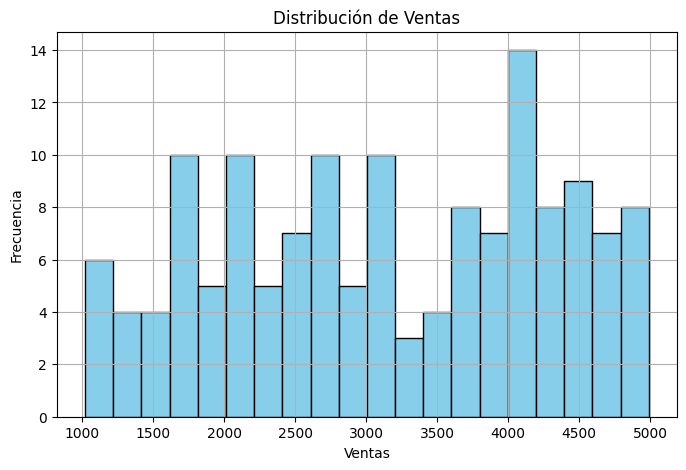

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(df['Ventas'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### 📈😊 A mayor satisfacción del cliente, las ventas tienden a ser más altas. Aunque no es una regla exacta, parece que los clientes contentos compran más.

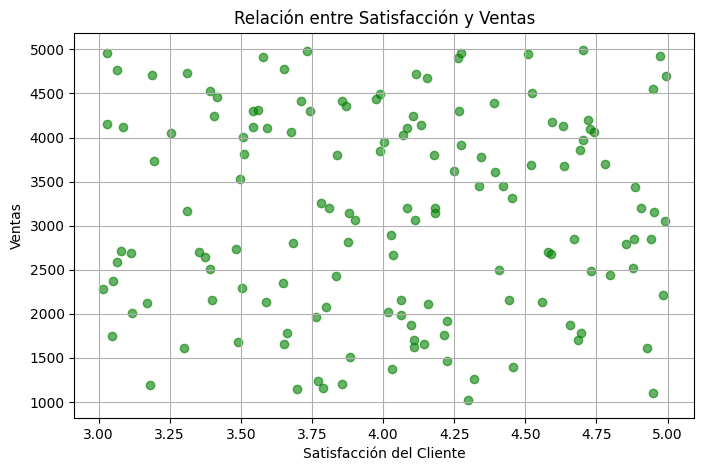

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['Satisfaccion_Cliente'], df['Ventas'], alpha=0.6, color='green')
plt.title('Relación entre Satisfacción y Ventas')
plt.xlabel('Satisfacción del Cliente')
plt.ylabel('Ventas')
plt.grid(True)
plt.show()

## 📶 Graficos con Seaborn

### 📦🗺️ Algunos productos venden bien en ciertas regiones pero no en otras. Esto puede servir para decidir dónde conviene ofrecer o promocionar cada producto.

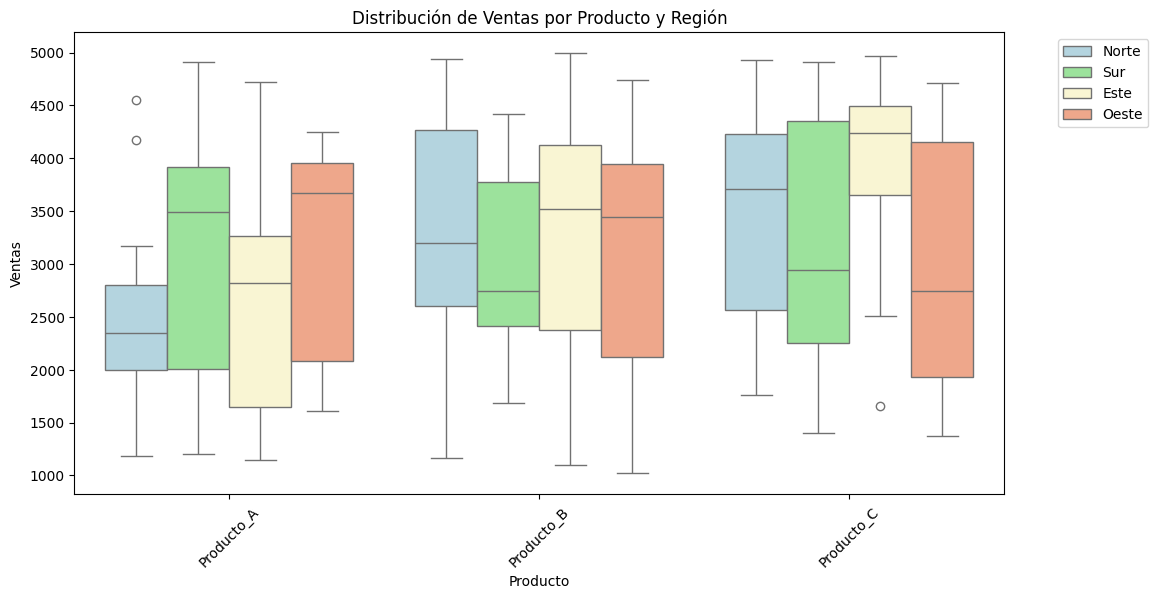

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Producto', y='Ventas', hue='Region', palette=colores_por_region)
plt.title('Distribución de Ventas por Producto y Región')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 💰📈📉 Hay productos con altos costos que venden mucho, pero otros no. O sea, gastar más en operar no siempre se traduce en vender más.




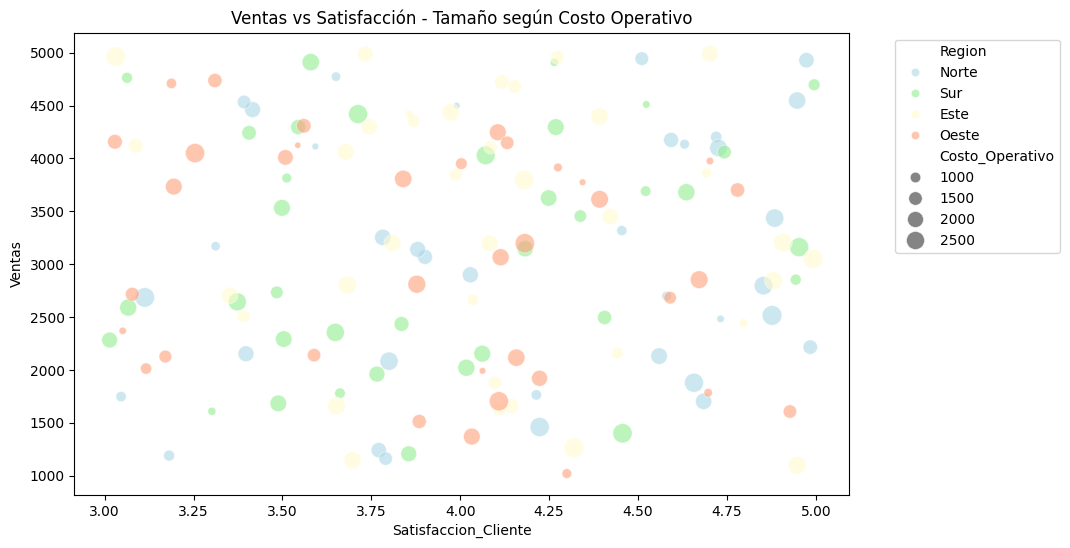

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Satisfaccion_Cliente', y='Ventas', size='Costo_Operativo', hue='Region', sizes=(20, 200), alpha=0.6, palette=colores_por_region)
plt.title('Ventas vs Satisfacción - Tamaño según Costo Operativo')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### 🤝📈 La única relación fuerte parece ser entre ventas y satisfacción del cliente.  
⚙️➖📈 El costo operativo no muestra fuerte correlacion con ventas.

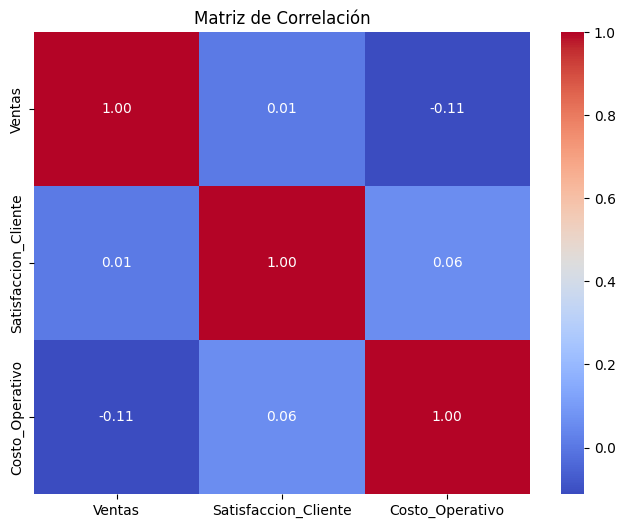

In [ ]:
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

### 📅📊 Hay una marcada estacionalidad y diferencias notables entre productos y regiones. Por ejemplo, el producto C crece en ciertos meses mientras que otros se mantienen estables.

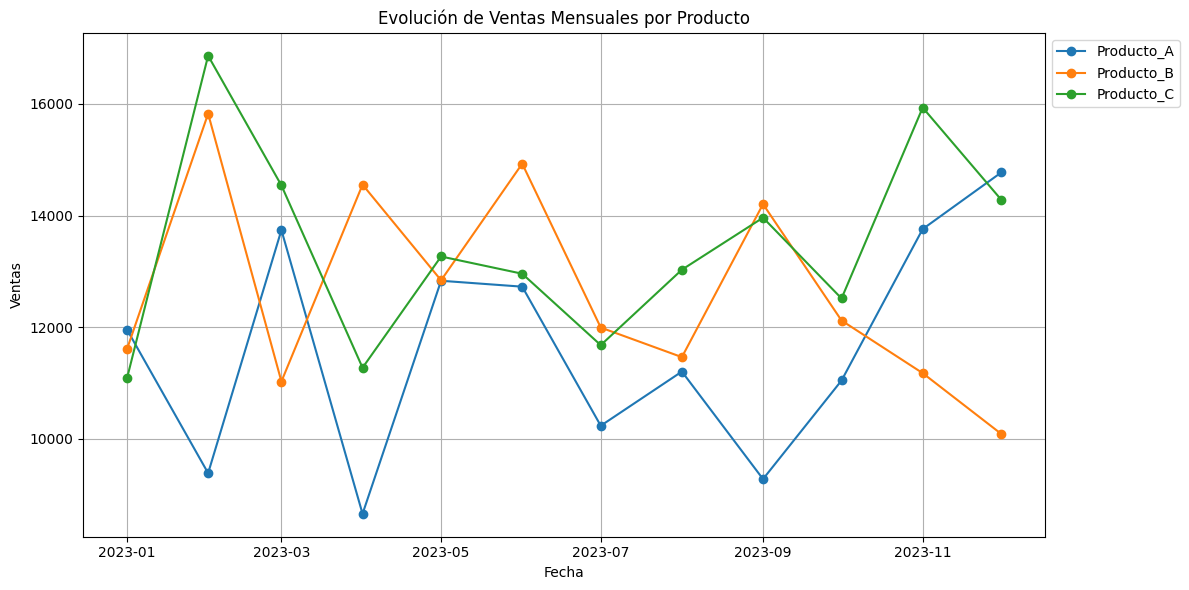

In [ ]:
# Asegurar que la columna 'Mes' esté en formato datetime
df['Mes'] = pd.to_datetime(df['Mes'])

# Crear tabla pivote para productos vs tiempo
pivot_df = df.pivot_table(index='Mes', columns='Producto', values='Ventas', aggfunc='sum')

# Colores opcionales para trazar
colors = sns.color_palette("tab10")

# Gráfico de líneas para productos a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.gca().set_prop_cycle(color=colors)

for column in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[column], label=column, marker='o')

plt.title('Evolución de Ventas Mensuales por Producto')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

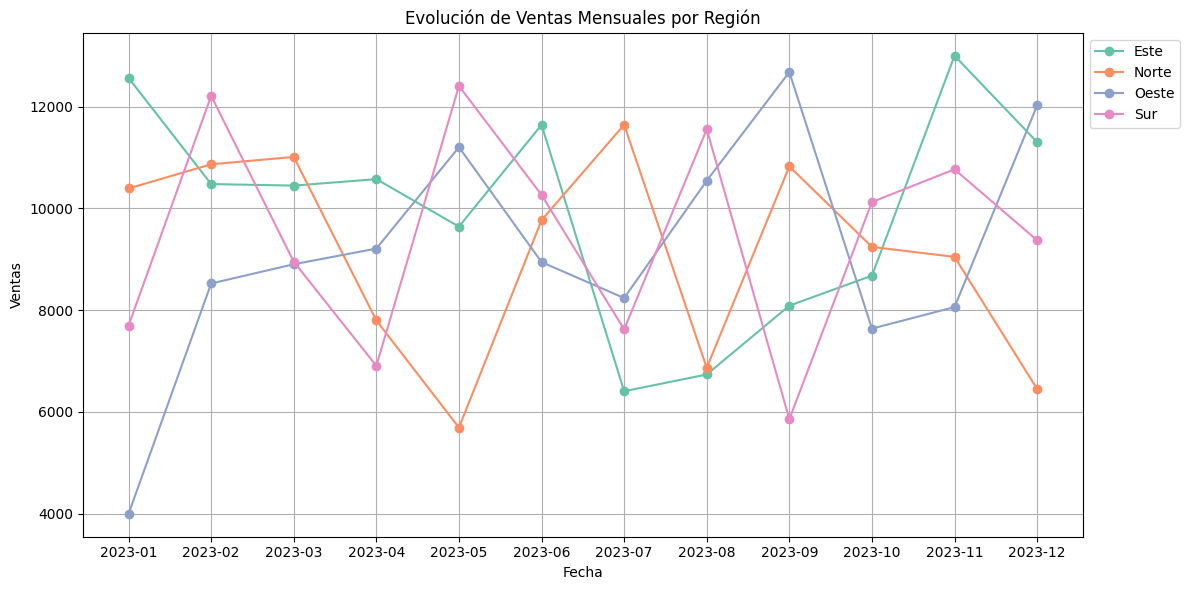

In [ ]:
pivot_region = df.pivot_table(index='Mes', columns='Region', values='Ventas', aggfunc='sum', )

plt.figure(figsize=(12, 6))
plt.gca().set_prop_cycle(color=sns.color_palette("Set2"))

for column in pivot_region.columns:
    plt.plot(pivot_region.index, pivot_region[column], label=column, marker='o')

plt.title('Evolución de Ventas Mensuales por Región')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

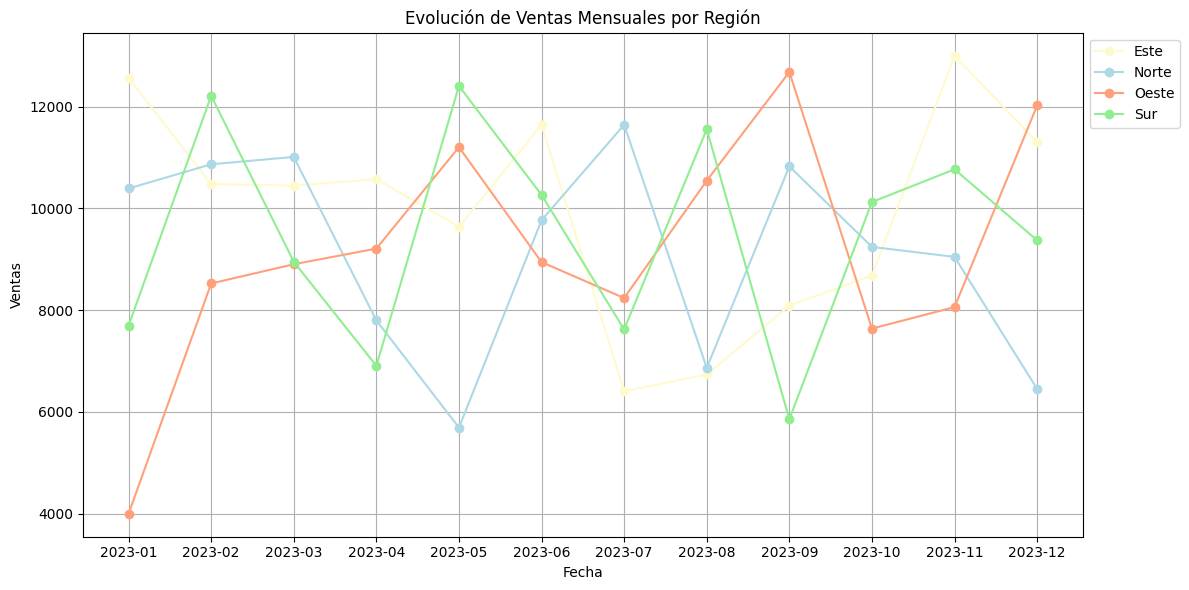

In [ ]:
pivot_region = df.pivot_table(index='Mes', columns='Region', values='Ventas', aggfunc='sum')
plt.figure(figsize=(12, 6))

plt.gca().set_prop_cycle(color=[colores_por_region[region] for region in pivot_region.columns])

for column in pivot_region.columns:
    plt.plot(pivot_region.index, pivot_region[column], label=column, marker='o')

plt.title('Evolución de Ventas Mensuales por Región')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()



---



## 🔍 Conclusiones Finales
A partir de los gráficos y resúmenes numéricos realizados, se puede concluir que:

* La satisfacción del cliente se relaciona positivamente con las ventas.

* La región y el producto son variables clave en el comportamiento de las ventas.

* El costo operativo no es un buen predictor del volumen de ventas en todos los casos.

* Existen patrones mensuales que podrían usarse para planificar promociones o ajustar la producción.

Los resultados apoyan parcialmente las hipótesis planteadas y brindan información valiosa para guiar decisiones comerciales estratégicas.